<a href="https://colab.research.google.com/github/daraseliya/course_date_engineer/blob/develop/Task_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт данных

In [ ]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [ ]:
df = pd.read_csv('/content/DataEngineer.csv')

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [ ]:
# Missing data - убираются пропуски NaN (ввод в процентах сколько пропусков)

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

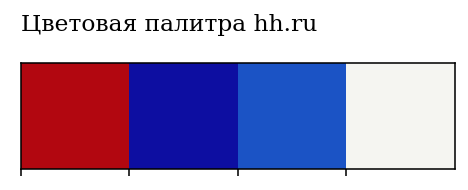

In [ ]:
# Palette
#sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
sns.palplot(['#b20710', '#0d0ea1', '#1b53c5','#f5f5f1'])

plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=12,y=1.2)
plt.show()

Подготовка данных

In [ ]:
#df.groupby("Company Name").count()
df.groupby(['Company Name'])['Job Title'].count()

Company Name
12traits                          1
1819, LLC\n3.0                    1
22nd Century Staffing\n4.3        1
22nd Century Technologies\n3.7    3
4C Insights\n4.4                  1
                                 ..
realtor.com\n2.7                  1
sensemetrics\n3.2                 2
softsnippets                      1
thredUP\n3.9                      1
zacxo                             1
Name: Job Title, Length: 1457, dtype: int64

In [ ]:
df['count'] = 1

# Lets retrieve just the first Company Name
#df['first_company'] = df['Company Name'].apply(lambda x: x.split(",")[0])
df['first_company'] = df['Company Name'].apply(lambda x: x.split("\n")[0].split(",")[0])
df['first_company'].head()

0                    Sagence
1     Enterprise Integration
2       Maestro Technologies
3                Jane Street
4    GNY Insurance Companies
Name: first_company, dtype: object

1. Построить график компаний с самым большим кол-вом вакансий

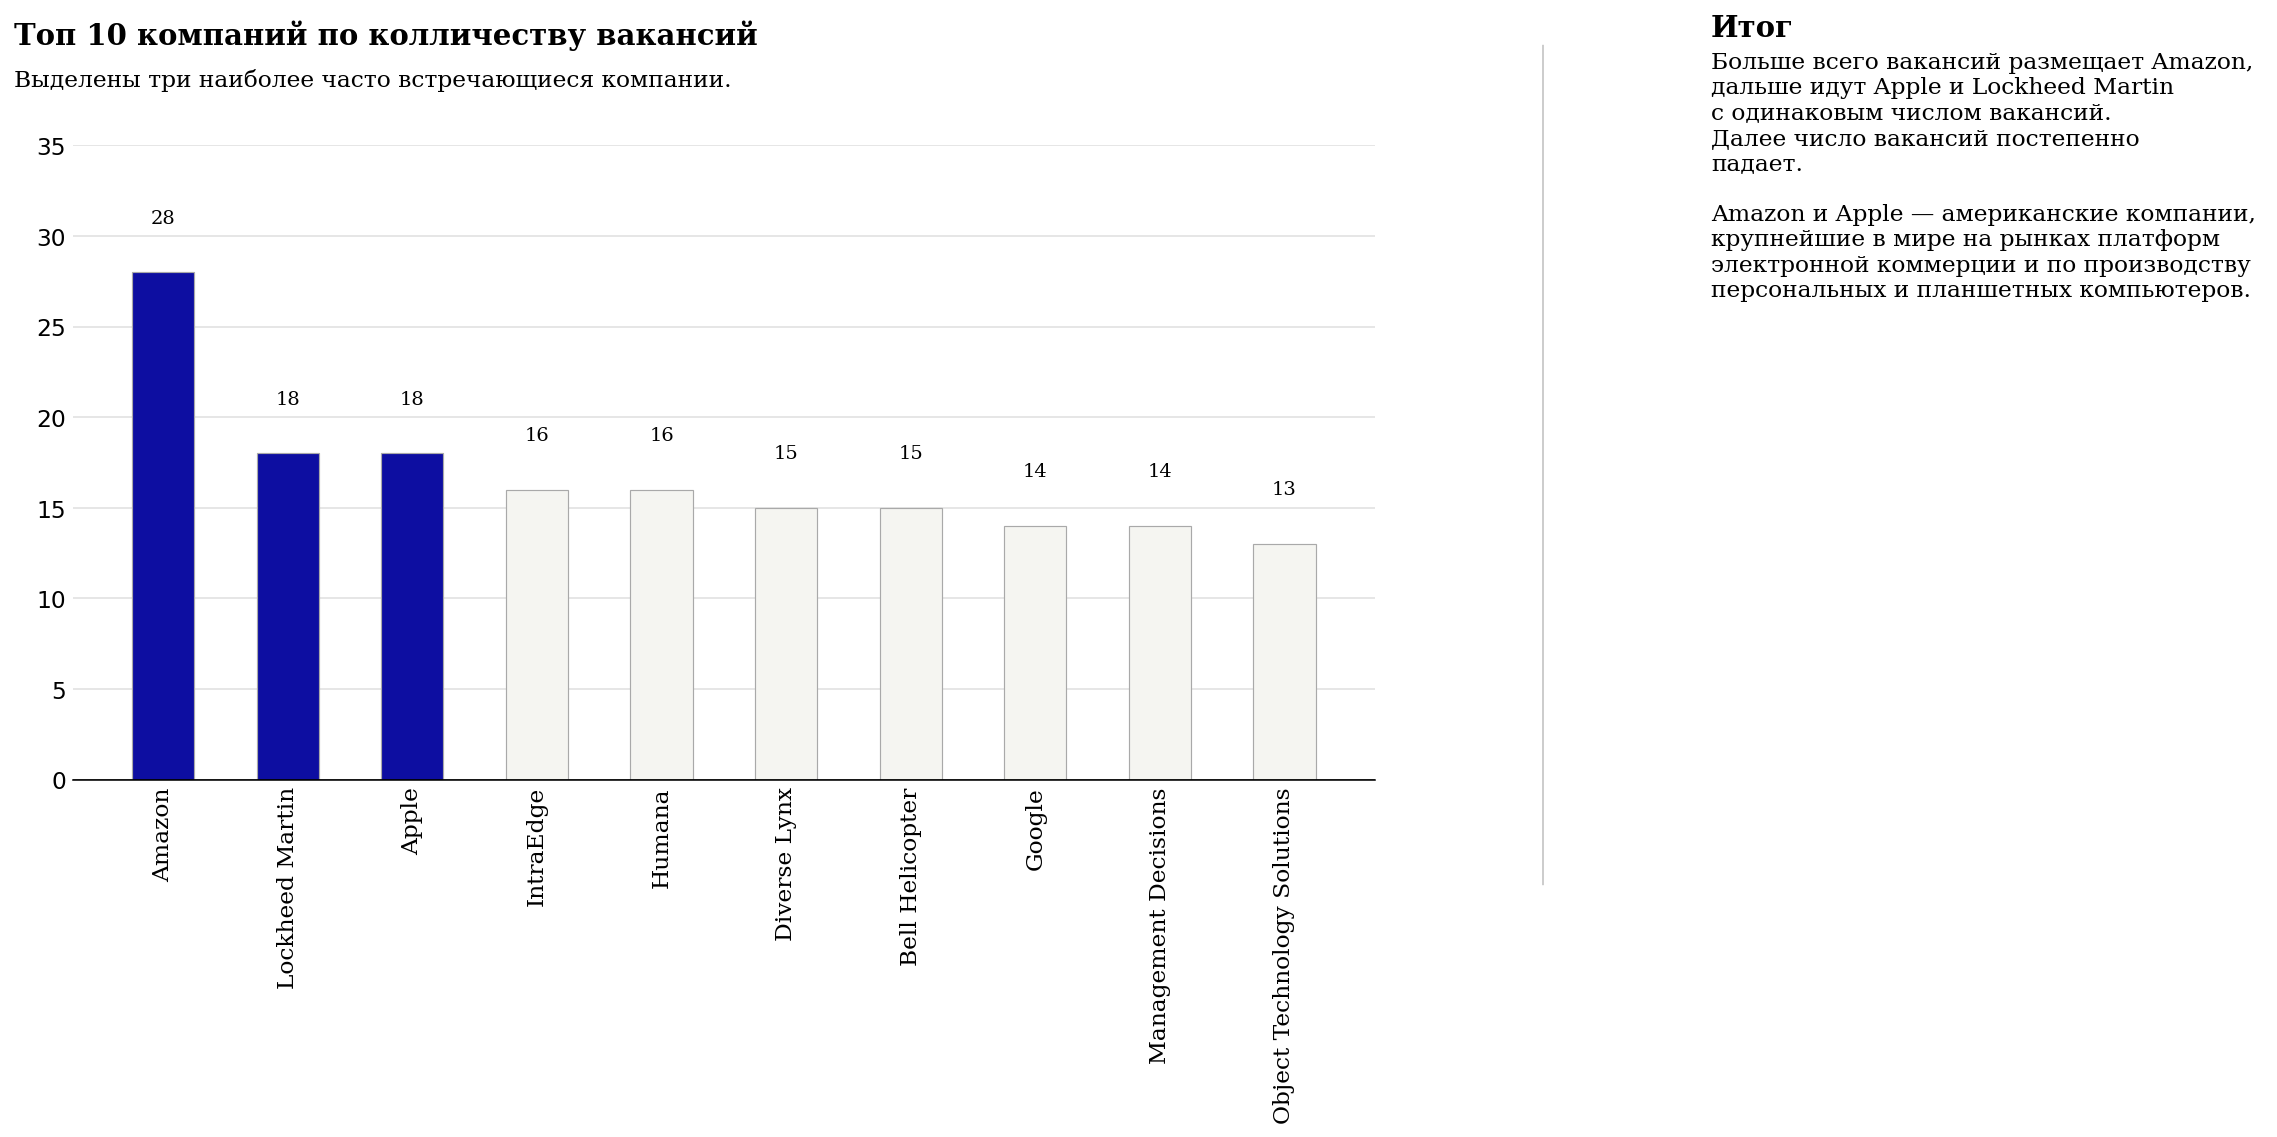

In [ ]:
data = df.groupby('first_company')['count'].sum().sort_values(ascending=False)[:10]
#data = df.groupby(['first_company'])['Job Title'].count().sort_values(ascending=False)[:7]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 3), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 компаний по колличеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три наиболее часто встречающиеся компании.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Больше всего вакансий размещает Amazon,
дальше идут Apple и Lockheed Martin
с одинаковым числом вакансий.
Далее число вакансий постепенно 
падает.

Amazon и Apple — американские компании, 
крупнейшие в мире на рынках платформ 
электронной коммерции и по производству 
персональных и планшетных компьютеров.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 40, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Тут я посчитала, что будет нагляднее гистограмма. Если нужен "залитый" график, то пример на такой график я сделала ниже



2. Построить график самых популярный названий в вакансиях

In [ ]:
#           .replace('Senior ', '')  Engineer I Junior  DATA ENGINEER

In [ ]:
df['first_job'] = df['Job Title'].apply(lambda x: x.replace('Engineers', 'Engineer').replace('Engineer ', 'Engineer').replace('DATA ENGINEER', 'Data Engineer').replace('Senior ', '').replace('Junior ', '').replace('Sr. ', '').replace('Jr. ', '').replace('Sr ', '').split("II")[0].split("(")[0].split(" -")[0].split("-")[0].split("\n")[0].split(",")[0])


In [ ]:
#df['first_job'].head()

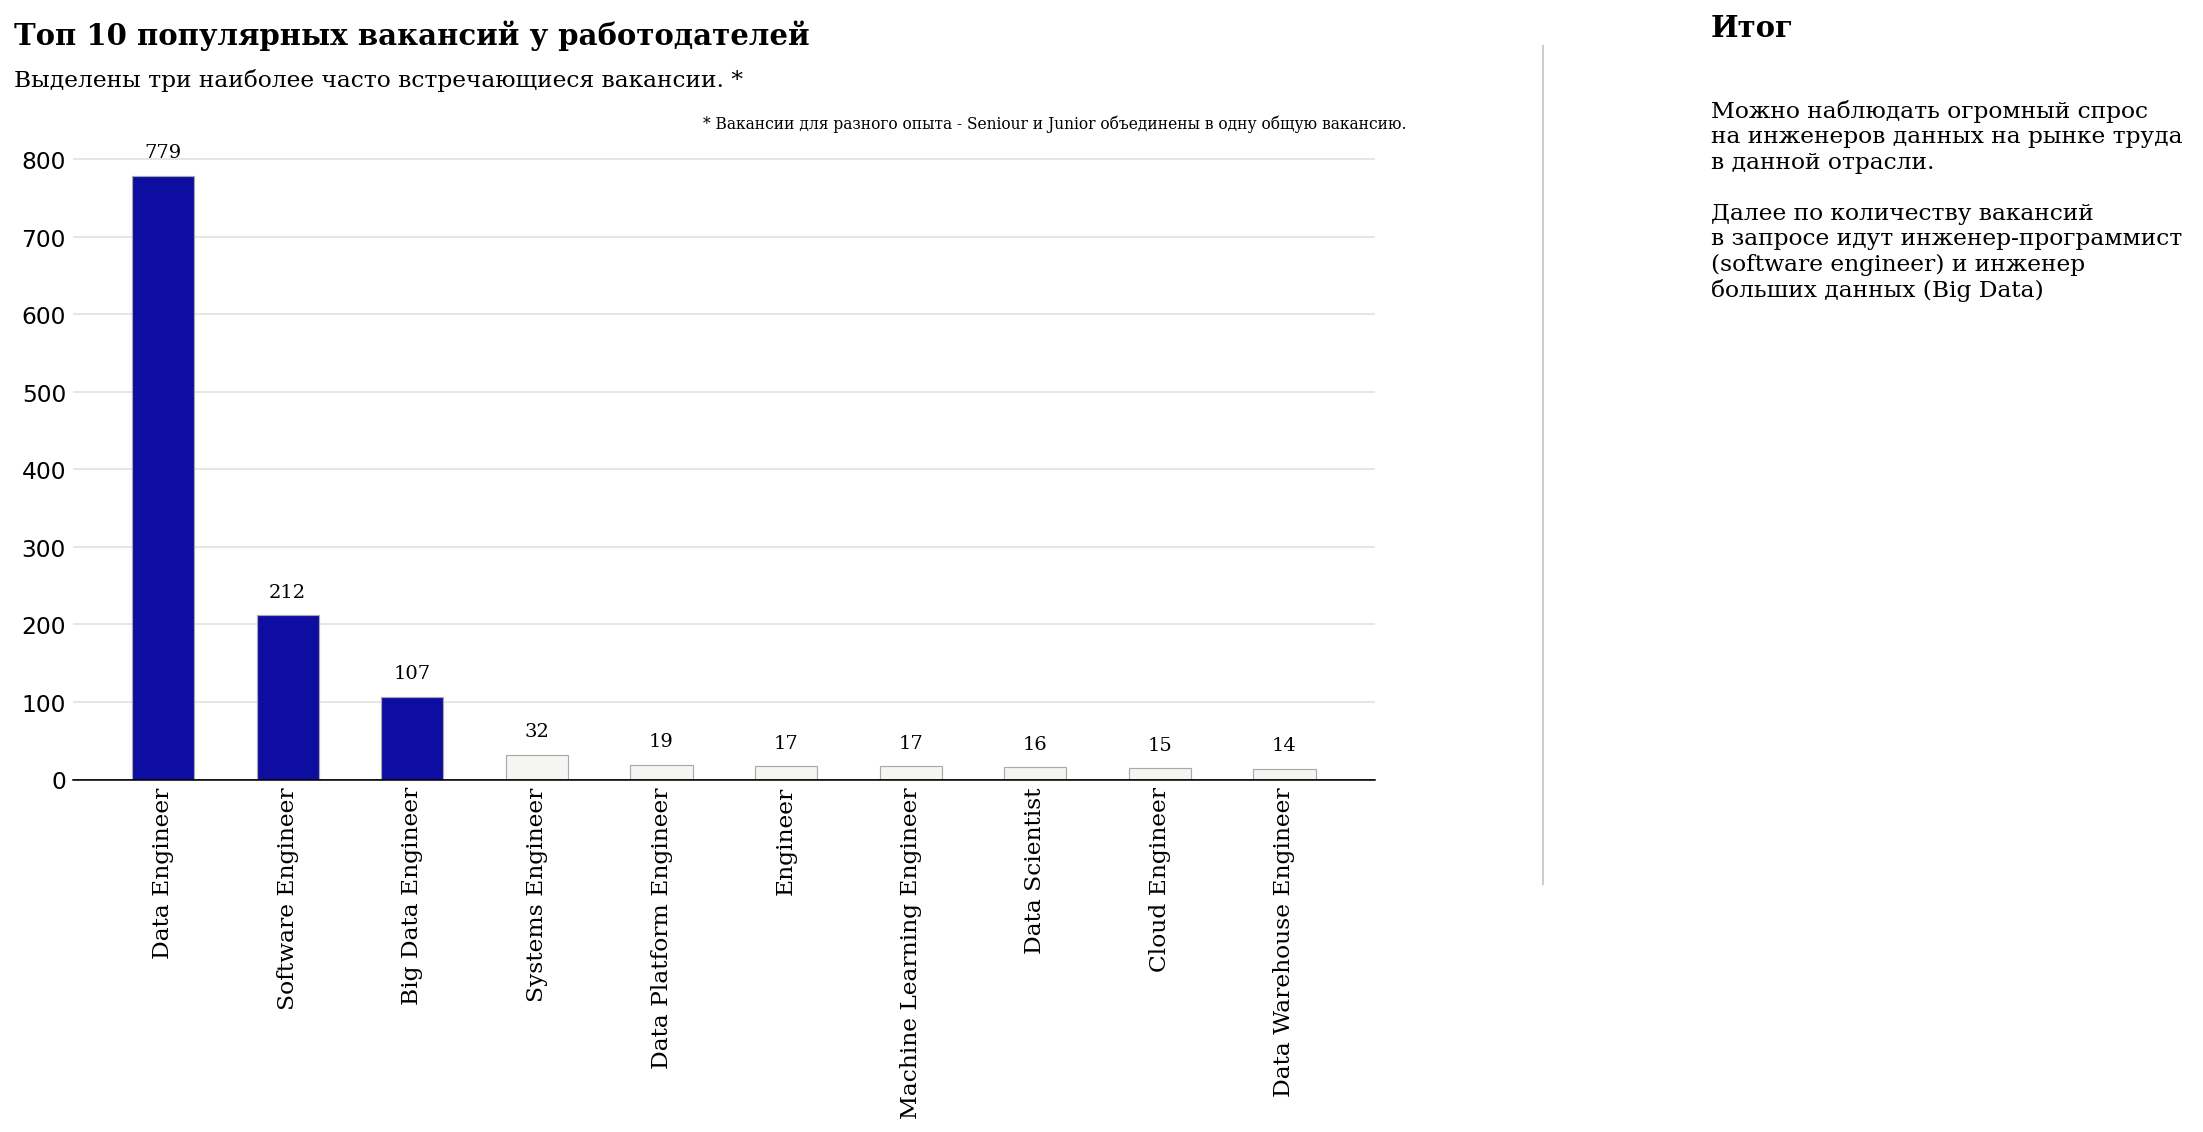

In [ ]:
data = df.groupby('first_job')['count'].sum().sort_values(ascending=False)[:10]
#data = df.groupby(['first_company'])['Job Title'].count().sort_values(ascending=False)[:7]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 30), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 популярных вакансий у работодателей', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три наиболее часто встречающиеся вакансии. *', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.50, 0.9, '* Вакансии для разного опыта - Seniour и Junior объединены в одну общую вакансию. ', fontsize=8, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Можно наблюдать огромный спрос 
на инженеров данных на рынке труда
в данной отрасли.

Далее по количеству вакансий
в запросе идут инженер-программист 
(software engineer) и инженер
больших данных (Big Data)
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 850, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
#df.first_job

In [ ]:
job_names = list(df.first_job)

In [ ]:
job_names_dict = {}
j_nam_count = 0
for i in job_names:
  if i in job_names_dict:
    job_names_dict[i] +=1
  else:
    job_names_dict[i]=1
    j_nam_count +=1

In [ ]:
#for key,value in job_names_dict.items():
#  if value>7:
#    print(key,value)

In [ ]:
##job_names_dict

3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [ ]:
#df.groupby('Job Title')['Location'].value_counts().unstack().fillna(0).T #.sum()#.cumsum(axis=0)

In [ ]:
df.groupby(['Location'])['Job Title'].count().sort_values(ascending=False)[:12]

Location
Austin, TX          199
Houston, TX         199
San Diego, CA       195
Chicago, IL         192
San Antonio, TX     190
New York, NY        187
Philadelphia, PA    135
Jacksonville, FL    122
Phoenix, AZ         117
Los Angeles, CA     106
Irving, TX          106
Fort Worth, TX      102
Name: Job Title, dtype: int64

In [ ]:
#df.groupby('Location')['count'].sum().sort_values(ascending=False)[:12]

In [ ]:
df.groupby('Job Title')['Location'].value_counts().unstack().fillna(0).cumsum(axis=0).T  #.sum()

Job Title,!!!100% Remote!!! Sr. Data and Integration Engineer,#104733 HPC Systems and Data Engineer,(Big Data Developer) Applications Systems Engineer 4,"(Project Staff) Consultant, Data Engineer","(SONUS) Engineer/Senior Engineer, IT Network Infrastructure",(Senior) Data Engineer,+ Data Engineer,. Java Engineer,"7232 Data Engineer (Analyst/Programmer - Career), Information Technology DevOps",: Sr. Data Engineer,...,Water Resources Engineer II,Web Engineer,Web Engineer 2,Web Systems Engineer,Windows Engineer Lead - Citrix,Wireless Solutions Engineer - Sales Analytics,Wiring Installation Engineer,eCom Data Engineer,eDiscovery Pre-Sales Engineer 19-0828,machine learning Engineer with AWS
Location,,,,,,,,,,,,,,,,,,,,,
"Addison, TX",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
"Allen, TX",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
"Ambler, PA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
"Anaheim, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
"Arlington, TX",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wayne, PA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
"Westlake, TX",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
"Wilmington, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#fig, ax = plt.subplots()
#ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))

In [ ]:
data_sub=pd.DataFrame(df.groupby('Location')['count'].sum().sort_values(ascending=False).reset_index())
data_sub

,Location,count
0,"Austin, TX",199
1,"Houston, TX",199
2,"San Diego, CA",195
3,"Chicago, IL",192
4,"San Antonio, TX",190
...,...,...
108,"Holmdel, NJ",1
109,"Collegeville, PA",1
110,"Ponte Vedra, FL",1
111,"Cerritos, CA",1


In [ ]:
#df.groupby('Location')['count'].value_counts().unstack().fillna(0)#.cumsum(axis=0)

In [ ]:
#data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
#data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
#data_sub = df.groupby('Location')['count'].value_counts().unstack().fillna(0)#.cumsum(axis=0).T
data_sub2 = data_sub[:40]
data_sub2['Value'] = data_sub2['count'] 
data_sub2 = data_sub2.reset_index()

In [ ]:
#data_sub2

In [ ]:
df_polar = data_sub2.sort_values(by='index',ascending=False)

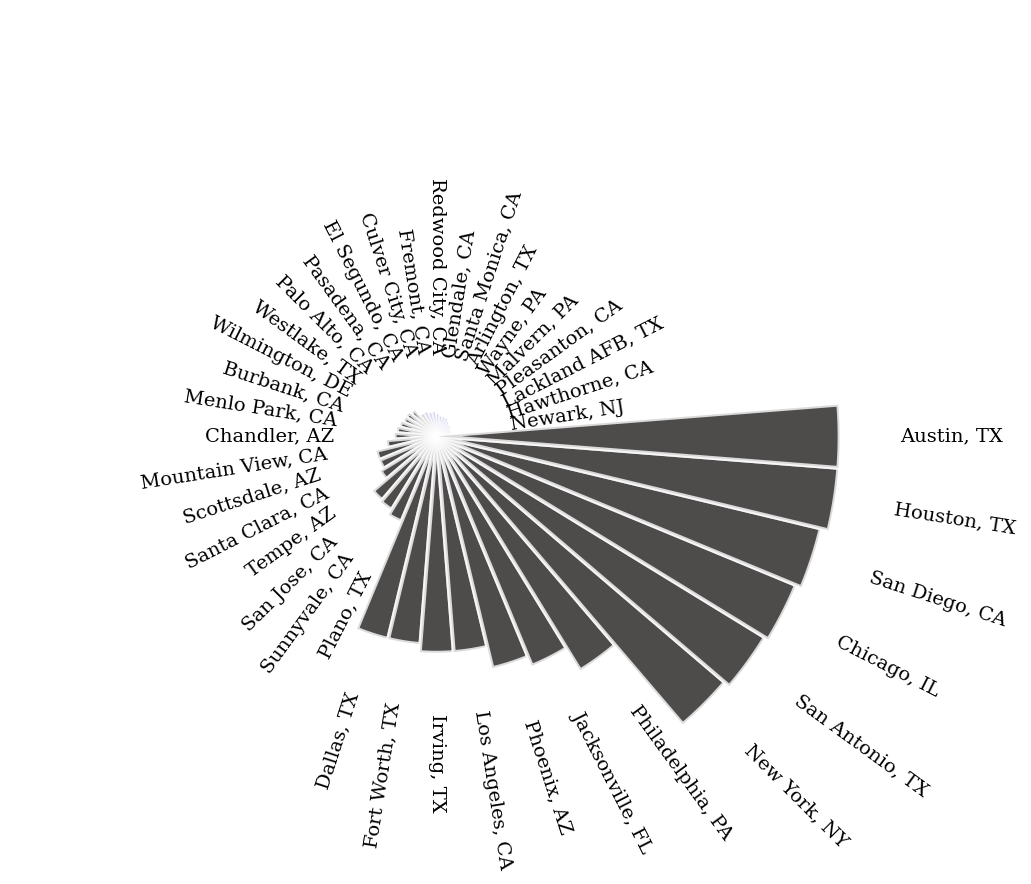

In [ ]:
color_map = ['#221f1f' for _ in range(50)]
#color_map[0] = color_map[11] =  '#b20710' # color highlight

for i in range(30):
  if data_sub2.Value[i]>=100:
    color_map[i] =  '#0d0ea1' # color highlight



# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, df_polar["Location"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

Красиво, но не понятно, слишком много городов, поэтому можно еще сократить их число:

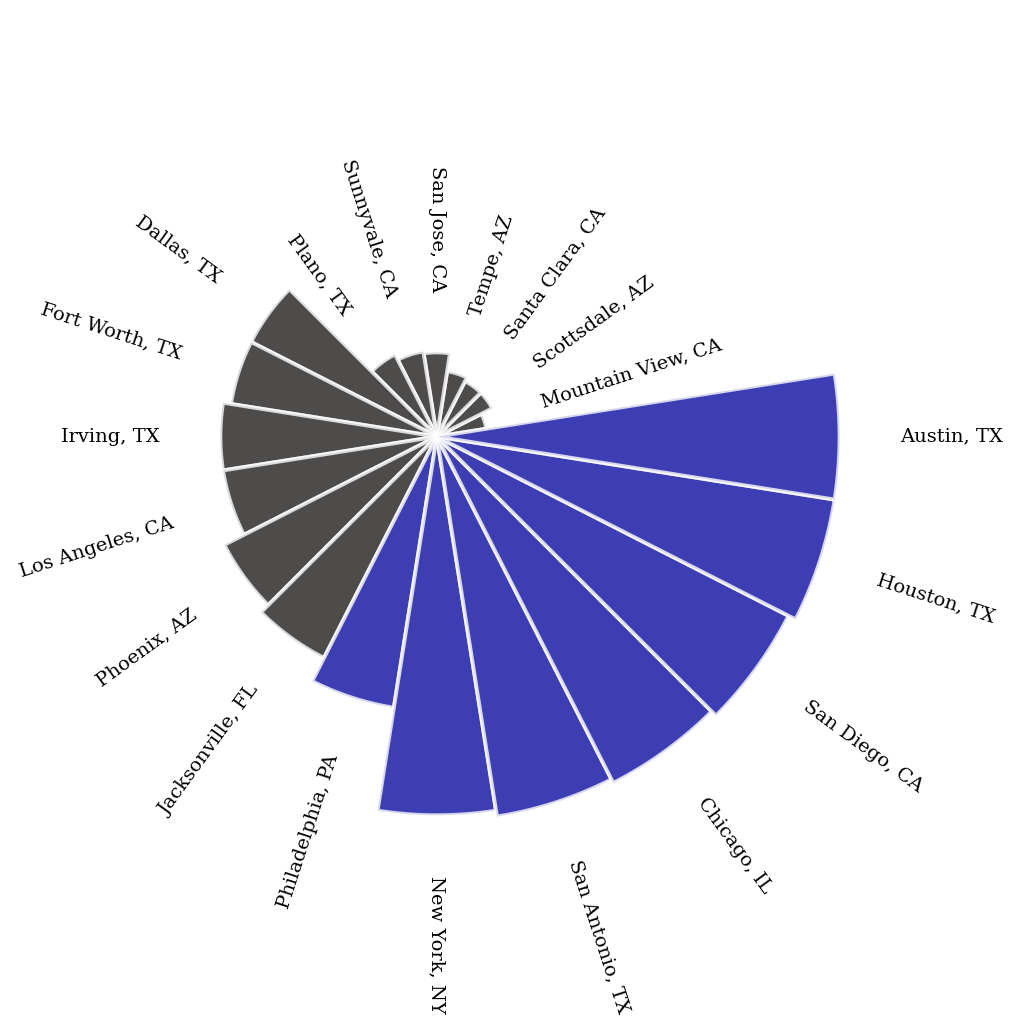

In [ ]:
data_sub2 = data_sub[:20]
data_sub2['Value'] = data_sub2['count'] 
data_sub2 = data_sub2.reset_index()
df_polar = data_sub2.sort_values(by='index',ascending=False)

color_map = ['#0d0ea1' for _ in range(50)]
#color_map[0] = color_map[11] =  '#b20710' # color highlight

for i in range(20):
  if data_sub2.Value[i]>=100:
    color_map[i] =  '#221f1f' # color highlight



# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, df_polar["Location"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

4. Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [ ]:
#df.groupby('Type of ownership')['count'].value_counts().unstack().fillna(0).cumsum(axis=0)

In [ ]:
data_own = pd.DataFrame(df.groupby('Type of ownership')['count'].sum().sort_values(ascending=False).reset_index())
data_own

,Type of ownership,count
0,Company - Private,1392
1,Company - Public,754
2,Subsidiary or Business Segment,126
3,-1,119
4,Nonprofit Organization,48
5,Unknown,30
6,Government,21
7,College / University,13
8,Contract,10
9,Private Practice / Firm,6


In [ ]:
#data_own['Type of ownership']#.value_counts()#.index
#data_own["count"]

In [ ]:
data_own['Value'] = data_own['Type of ownership'] 
df_polar_own = data_own.sort_values(by='count',ascending=False)

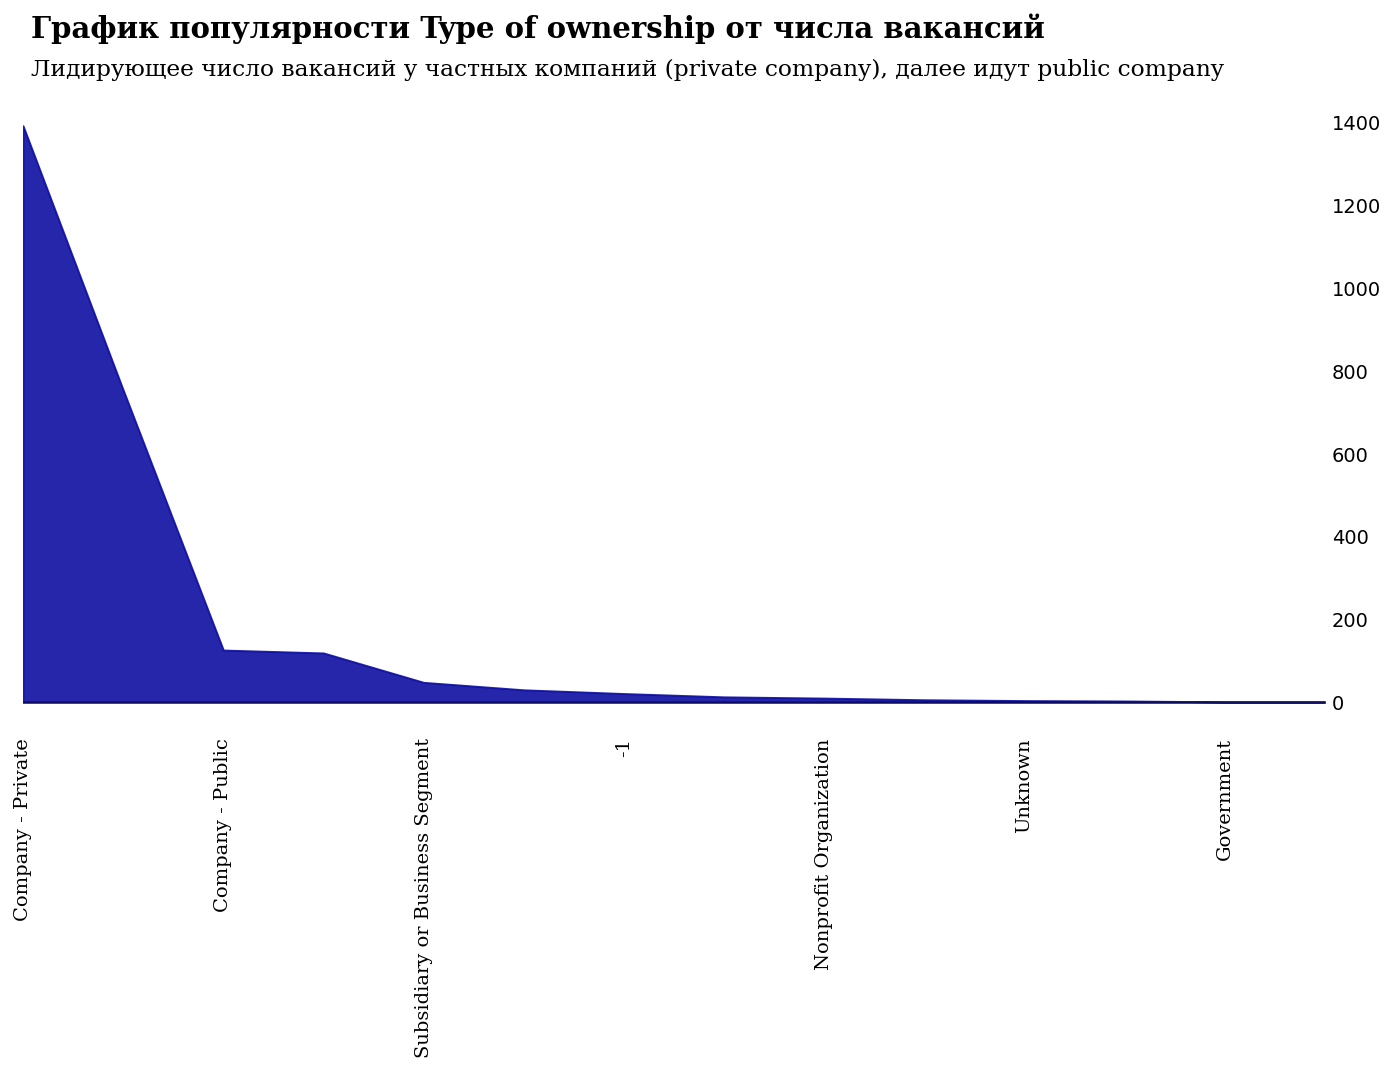

In [ ]:
#data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#0d0ea1", "#221f1f"]

#for i, mtv in enumerate(df['Type of ownership'].value_counts().index):
mtv_rel = data_own["count"]
lab_rel = data_own['Type of ownership'].value_counts().index
ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[0], label=lab_rel, alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_own['Value'], fontfamily='serif', rotation=90)
ax.margins(x=0) # remove white spaces next to margins


fig.text(0.13, 0.95, 'График популярности Type of ownership от числа вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"Лидирующее число вакансий у частных компаний (private company), далее идут public company "

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

по какой то причине подпись на оси х съехала (через шаг)

Здесь возникла сложность, пока не получилось определить где косяк в коде, буду рада, если подскажите, но сама тоже попробую отладить


5. Построить график популярности по секторам работы

In [ ]:
data_sect=pd.DataFrame(df.groupby('Sector')['count'].sum().sort_values(ascending=False).reset_index())
data_sect

,Sector,count
0,Information Technology,890
1,Business Services,416
2,-1,375
3,Finance,177
4,Aerospace & Defense,94
5,Manufacturing,93
6,Insurance,82
7,Media,52
8,Health Care,51
9,"Oil, Gas, Energy & Utilities",37


In [ ]:
data_sect['Value'] = data_sect['Sector'] 
df_polar_sect = data_sect.sort_values(by='count',ascending=False)

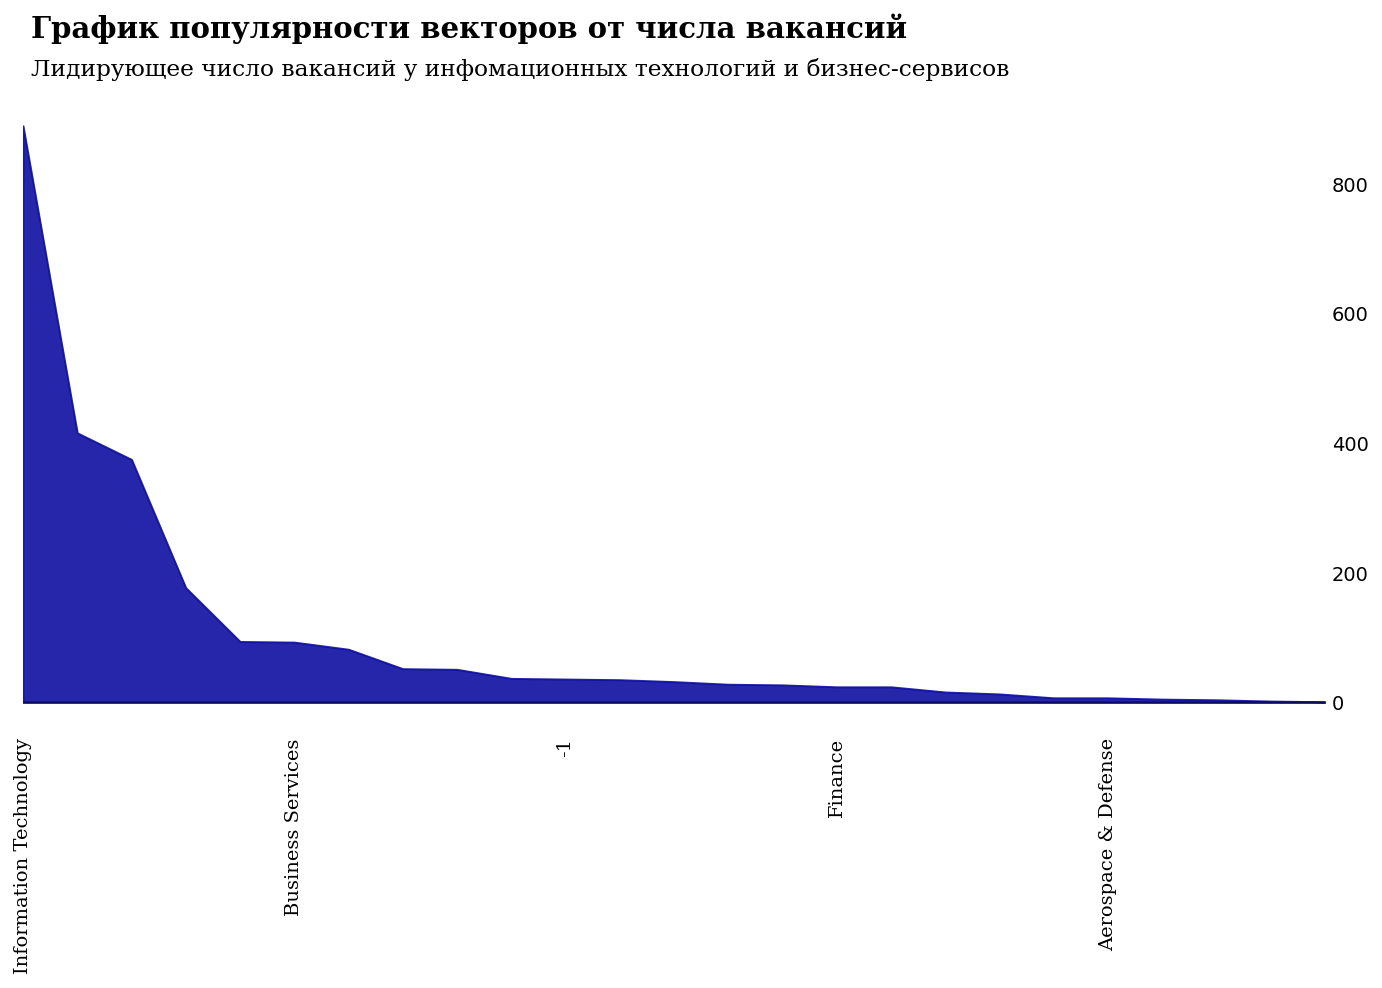

In [ ]:
#data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#0d0ea1", "#221f1f"]

#for i in enumerate(df['Sector'].value_counts().index):
mtv_sect = data_sect["count"]
lab_sect = data_sect['Sector'].value_counts().index
ax.fill_between(mtv_sect.index, 0, mtv_sect, color=color[0], label=lab_sect, alpha=0.9)

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sect['Value'], fontfamily='serif', rotation=90)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'График популярности векторов от числа вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"Лидирующее число вакансий у инфомационных технологий и бизнес-сервисов "

, fontsize=12, fontweight='light', fontfamily='serif')



#fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
#fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
#fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

опять пропускаются подписи осей по какой-то причине, не могу понять по какой


6. Построить график используя сектора работы и средний уровень зарплат в них

In [ ]:
df_mean_sal_sect=pd.DataFrame(df, columns = ["Sector","Salary Estimate"])
df_mean_sal_sect

,Sector,Salary Estimate
0,Business Services,$80K-$150K (Glassdoor est.)
1,Information Technology,$80K-$150K (Glassdoor est.)
2,Information Technology,$80K-$150K (Glassdoor est.)
3,Finance,$80K-$150K (Glassdoor est.)
4,Insurance,$80K-$150K (Glassdoor est.)
...,...,...
2523,Information Technology,$76K-$128K (Glassdoor est.)
2524,Business Services,$76K-$128K (Glassdoor est.)
2525,Information Technology,$76K-$128K (Glassdoor est.)
2526,-1,$76K-$128K (Glassdoor est.)


In [ ]:
df_mean_sal_sect["sal1"] = df_mean_sal_sect["Salary Estimate"].apply(lambda x: x.replace('$', '').replace('K', '000').split("(")[0].split("-")[0])
df_mean_sal_sect["sal2"] = df_mean_sal_sect["Salary Estimate"].apply(lambda x: x.replace('$', '').replace('K', '000').split("(")[0].split("-")[1])
df_mean_sal_sect["sal3"]= df_mean_sal_sect["sal1"].apply(lambda x: int(x)/2)
df_mean_sal_sect["sal4"]= df_mean_sal_sect["sal2"].apply(lambda x: int(x)/2)
df_mean_sal_sect["sal5"]= df_mean_sal_sect["sal3"]+df_mean_sal_sect["sal4"]
df_mean_sal_sect

,Sector,Salary Estimate,sal1,sal2,sal3,sal4,sal5
0,Business Services,$80K-$150K (Glassdoor est.),80000,150000,40000.0,75000.0,115000.0
1,Information Technology,$80K-$150K (Glassdoor est.),80000,150000,40000.0,75000.0,115000.0
2,Information Technology,$80K-$150K (Glassdoor est.),80000,150000,40000.0,75000.0,115000.0
3,Finance,$80K-$150K (Glassdoor est.),80000,150000,40000.0,75000.0,115000.0
4,Insurance,$80K-$150K (Glassdoor est.),80000,150000,40000.0,75000.0,115000.0
...,...,...,...,...,...,...,...
2523,Information Technology,$76K-$128K (Glassdoor est.),76000,128000,38000.0,64000.0,102000.0
2524,Business Services,$76K-$128K (Glassdoor est.),76000,128000,38000.0,64000.0,102000.0
2525,Information Technology,$76K-$128K (Glassdoor est.),76000,128000,38000.0,64000.0,102000.0
2526,-1,$76K-$128K (Glassdoor est.),76000,128000,38000.0,64000.0,102000.0


In [ ]:
data_mean_sal_sect = round(df_mean_sal_sect.groupby('Sector')['sal5'].mean().sort_values(ascending=False),2)
data_mean_sal_sect

Sector
Biotech & Pharmaceuticals             112314.29
Media                                 111076.92
Accounting & Legal                    106259.26
Health Care                           106235.29
Non-Profit                            105750.00
Information Technology                104754.49
Manufacturing                         103672.04
Education                             102375.00
Transportation & Logistics            100750.00
Restaurants, Bars & Food Services     100571.43
Arts, Entertainment & Recreation       99900.00
Telecommunications                     99625.00
-1                                     99542.67
Consumer Services                      99269.23
Finance                                97830.51
Business Services                      97405.05
Retail                                 96722.22
Insurance                              94518.29
Oil, Gas, Energy & Utilities           93324.32
Aerospace & Defense                    90867.02
Travel & Tourism                 

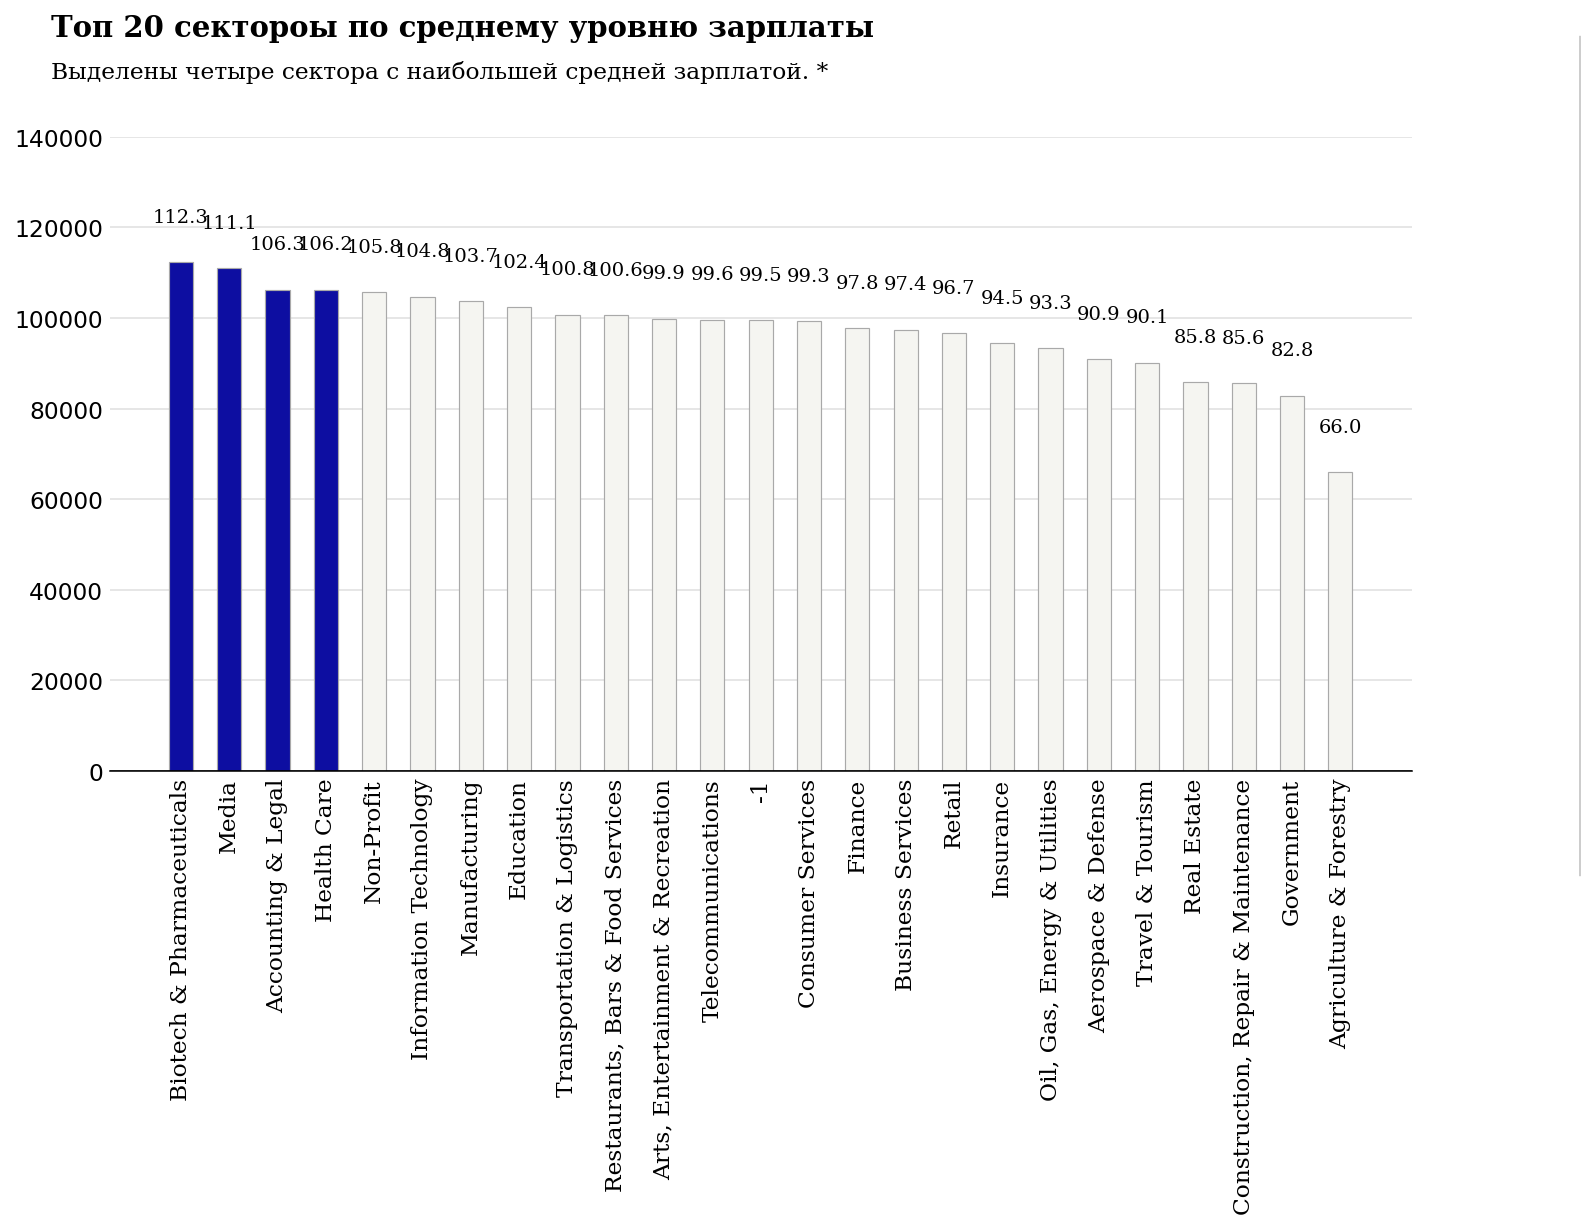

In [ ]:
# Plot - sector

color_map = ['#f5f5f1' for _ in range(30)]
color_map[0] = color_map[1] = color_map[2] = color_map[3]= '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_mean_sal_sect.index, data_mean_sal_sect, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data_mean_sal_sect.index:
    ax.annotate(f"{round(data_mean_sal_sect[i]/1000,1)}"+"", 
                   xy=(i, data_mean_sal_sect[i] + 10000), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_mean_sal_sect.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 20 сектороы по среднему уровню зарплаты ', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены четыре сектора с наибольшей средней зарплатой. *', fontsize=12, fontweight='light', fontfamily='serif')
#fig.text(0.50, 0.9, '* Вакансии для разного опыта - Seniour и Junior объединены в одну общую вакансию. ', fontsize=8, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 150000, 20000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
data_mean_sal_sect = data_mean_sal_sect[:10]

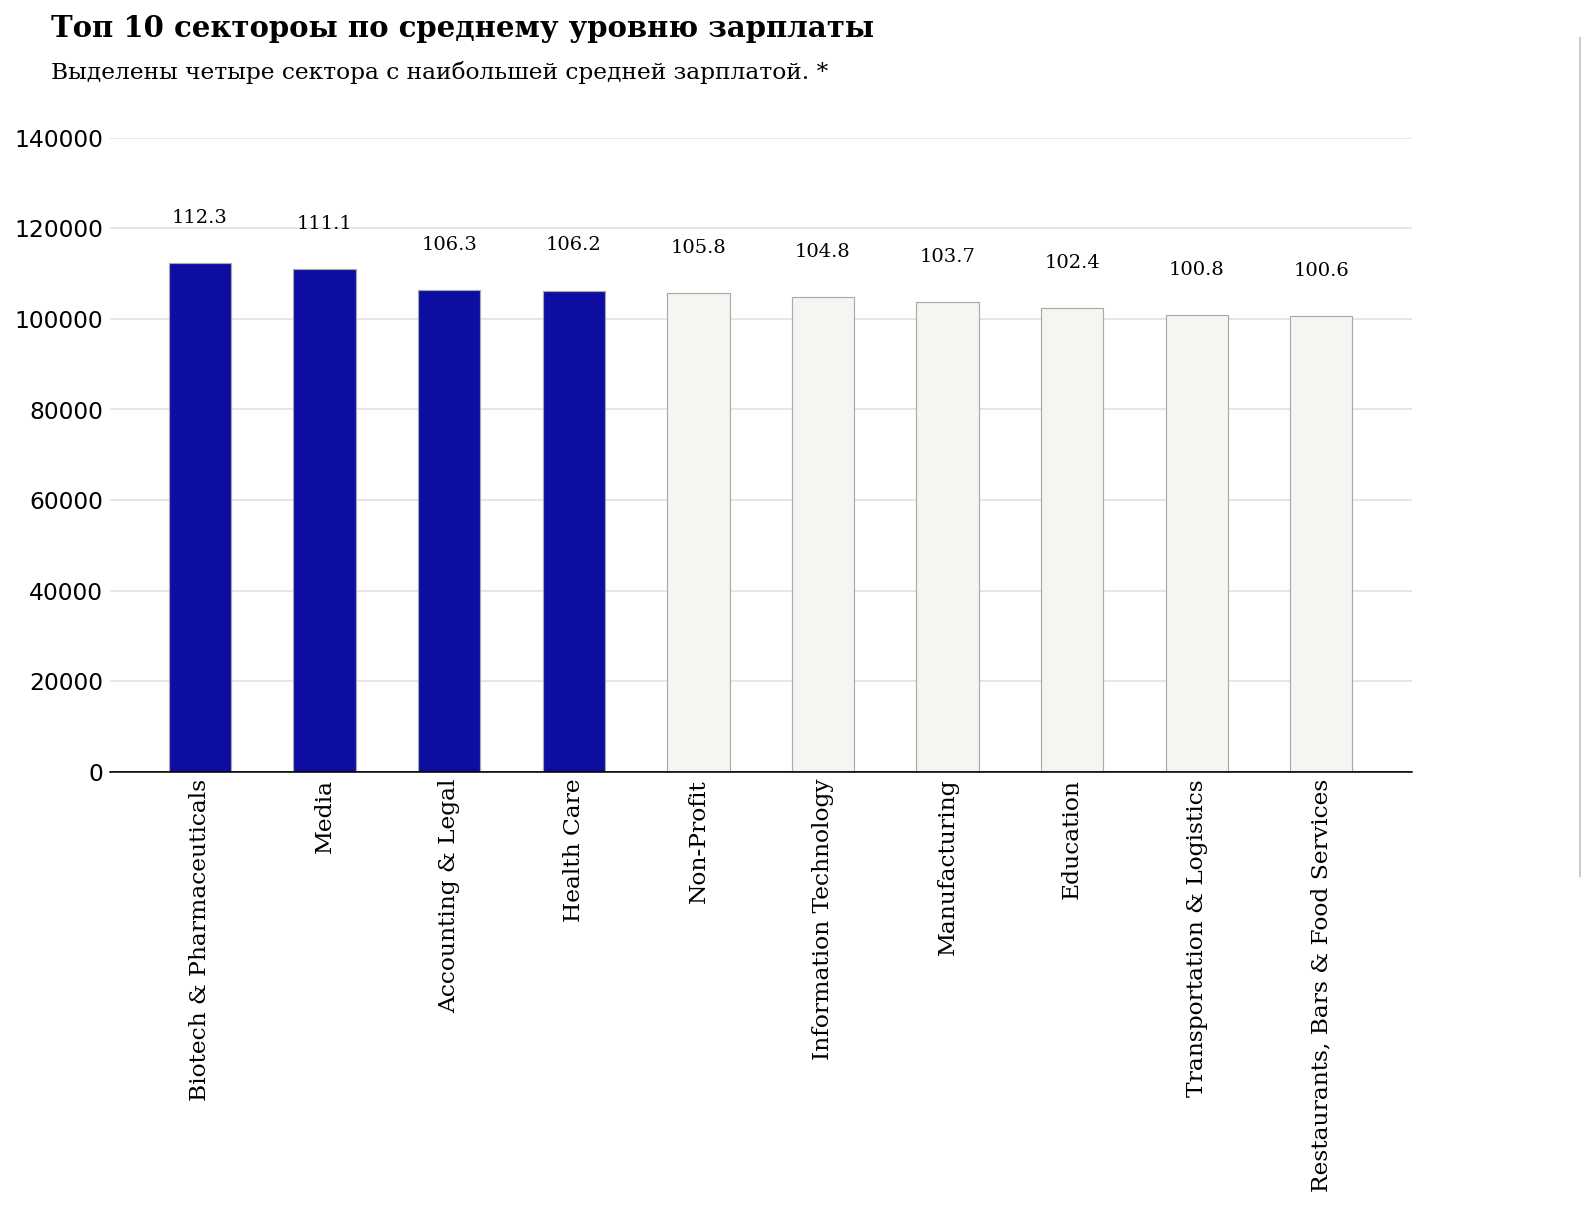

In [ ]:
# Plot - sector

color_map = ['#f5f5f1' for _ in range(30)]
color_map[0] = color_map[1] = color_map[2] = color_map[3]= '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_mean_sal_sect.index, data_mean_sal_sect, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data_mean_sal_sect.index:
    ax.annotate(f"{round(data_mean_sal_sect[i]/1000,1)}"+"", 
                   xy=(i, data_mean_sal_sect[i] + 10000), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_mean_sal_sect.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 сектороы по среднему уровню зарплаты ', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены четыре сектора с наибольшей средней зарплатой. *', fontsize=12, fontweight='light', fontfamily='serif')
#fig.text(0.50, 0.9, '* Вакансии для разного опыта - Seniour и Junior объединены в одну общую вакансию. ', fontsize=8, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 150000, 20000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


7. Построить гистограмму распределения рейтинга компаний

In [ ]:
df.groupby('first_company')['Rating'].mean().sort_values(ascending=False)

first_company
Purity Technology LLC         5.0
Wilbur Labs                   5.0
Blue Horizon Tek Solutions    5.0
HealthVerity                  5.0
Boulevard                     5.0
                             ... 
NBCP Sourcing                -1.0
Multivision Inc-IL           -1.0
Mosaic Group                 -1.0
Mobiveil Technologies Inc.   -1.0
zacxo                        -1.0
Name: Rating, Length: 1432, dtype: float64

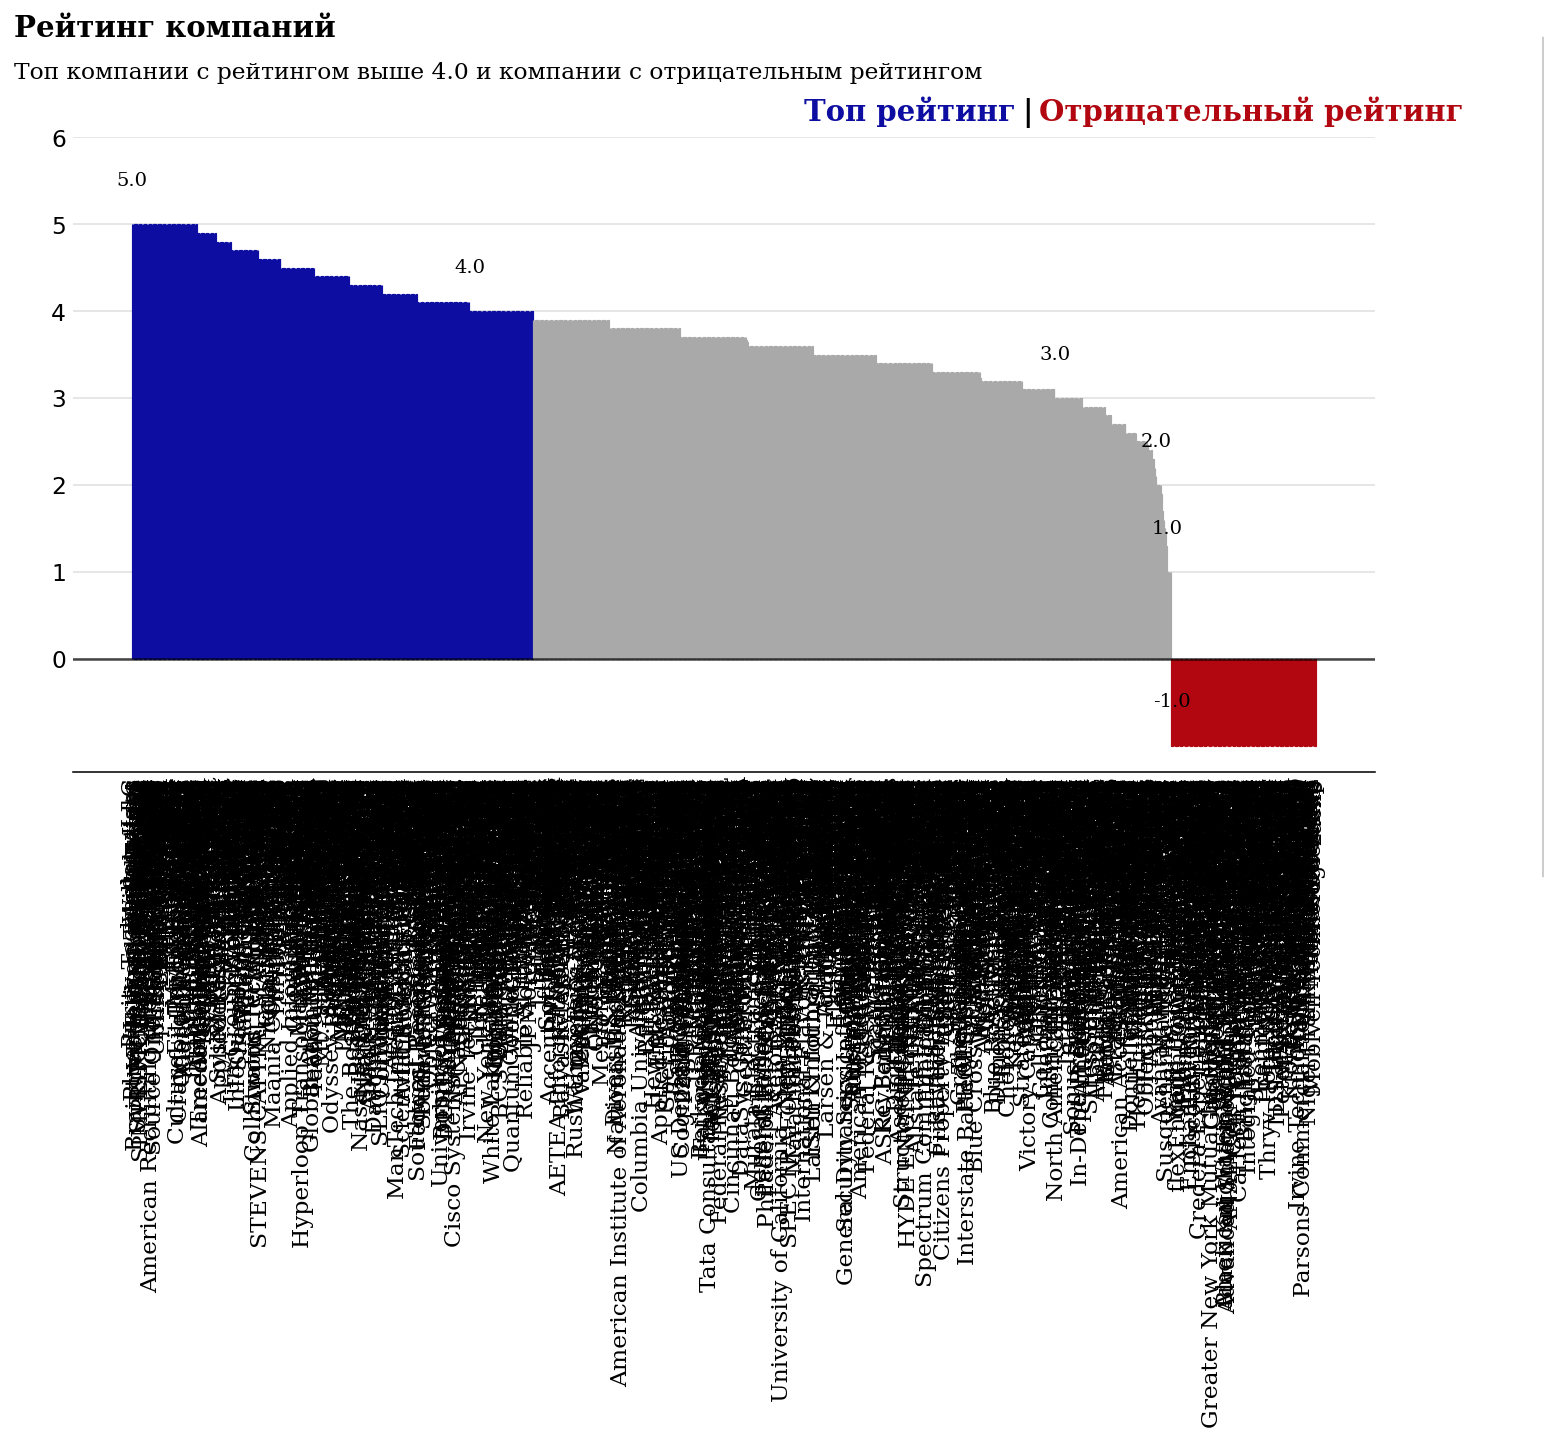

In [ ]:
data_rating = df.groupby('first_company')['Rating'].mean().sort_values(ascending=False)


# Plot

color_map = ['darkgray' for _ in range(3000)]
for i in range(1432):
  if data_rating[i]>=4.0:
    color_map[i] =  '#0d0ea1' # color highlight
  elif data_rating[i]<=0:
    color_map[i] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_rating.index, data_rating, width=0.5, 
       edgecolor=color_map, #'#6a72c2'
       linewidth=0.6,color=color_map)

#annotations
annot_rate1=[]

for i in data_rating.index:
  if data_rating[i] % 1 ==0 and data_rating[i] not in annot_rate1:
    annot_rate1.append(data_rating[i])
    ax.annotate(f"{round(data_rating[i],1)}", 
                   xy=(i, data_rating[i] + 0.5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_rating.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Рейтинг компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Топ компании с рейтингом выше 4.0 и компании с отрицательным рейтингом', fontsize=12, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#Больше всего вакансий размещает Amazon,
#дальше идут Apple и Lockheed Martin
#с одинаковым числом вакансий.
#Далее число вакансий постепенно 
#падает.

#Amazon и Apple — американские компании, 
#крупнейшие в мире на рынках платформ 
#электронной коммерции и по производству 
#персональных и планшетных компьютеров.
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 7, 1) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.text(0.11+0.45,0.9,"Топ рейтинг", fontweight="bold", fontfamily='serif', fontsize=15, color='#0d0ea1')
fig.text(0.19+0.5,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2+0.5,0.9,"Отрицательный рейтинг", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')

#ax._legend.remove()

plt.show()

Честно говоря не придумала, как тут можно лучше показать. Слмшком много компаний. Если выбрать только топовые компании, то не интересно смотреть рейтинг, он почти одинаковый. Если смотреть по всему рейтингу - на легенде названия компаний не четабельны

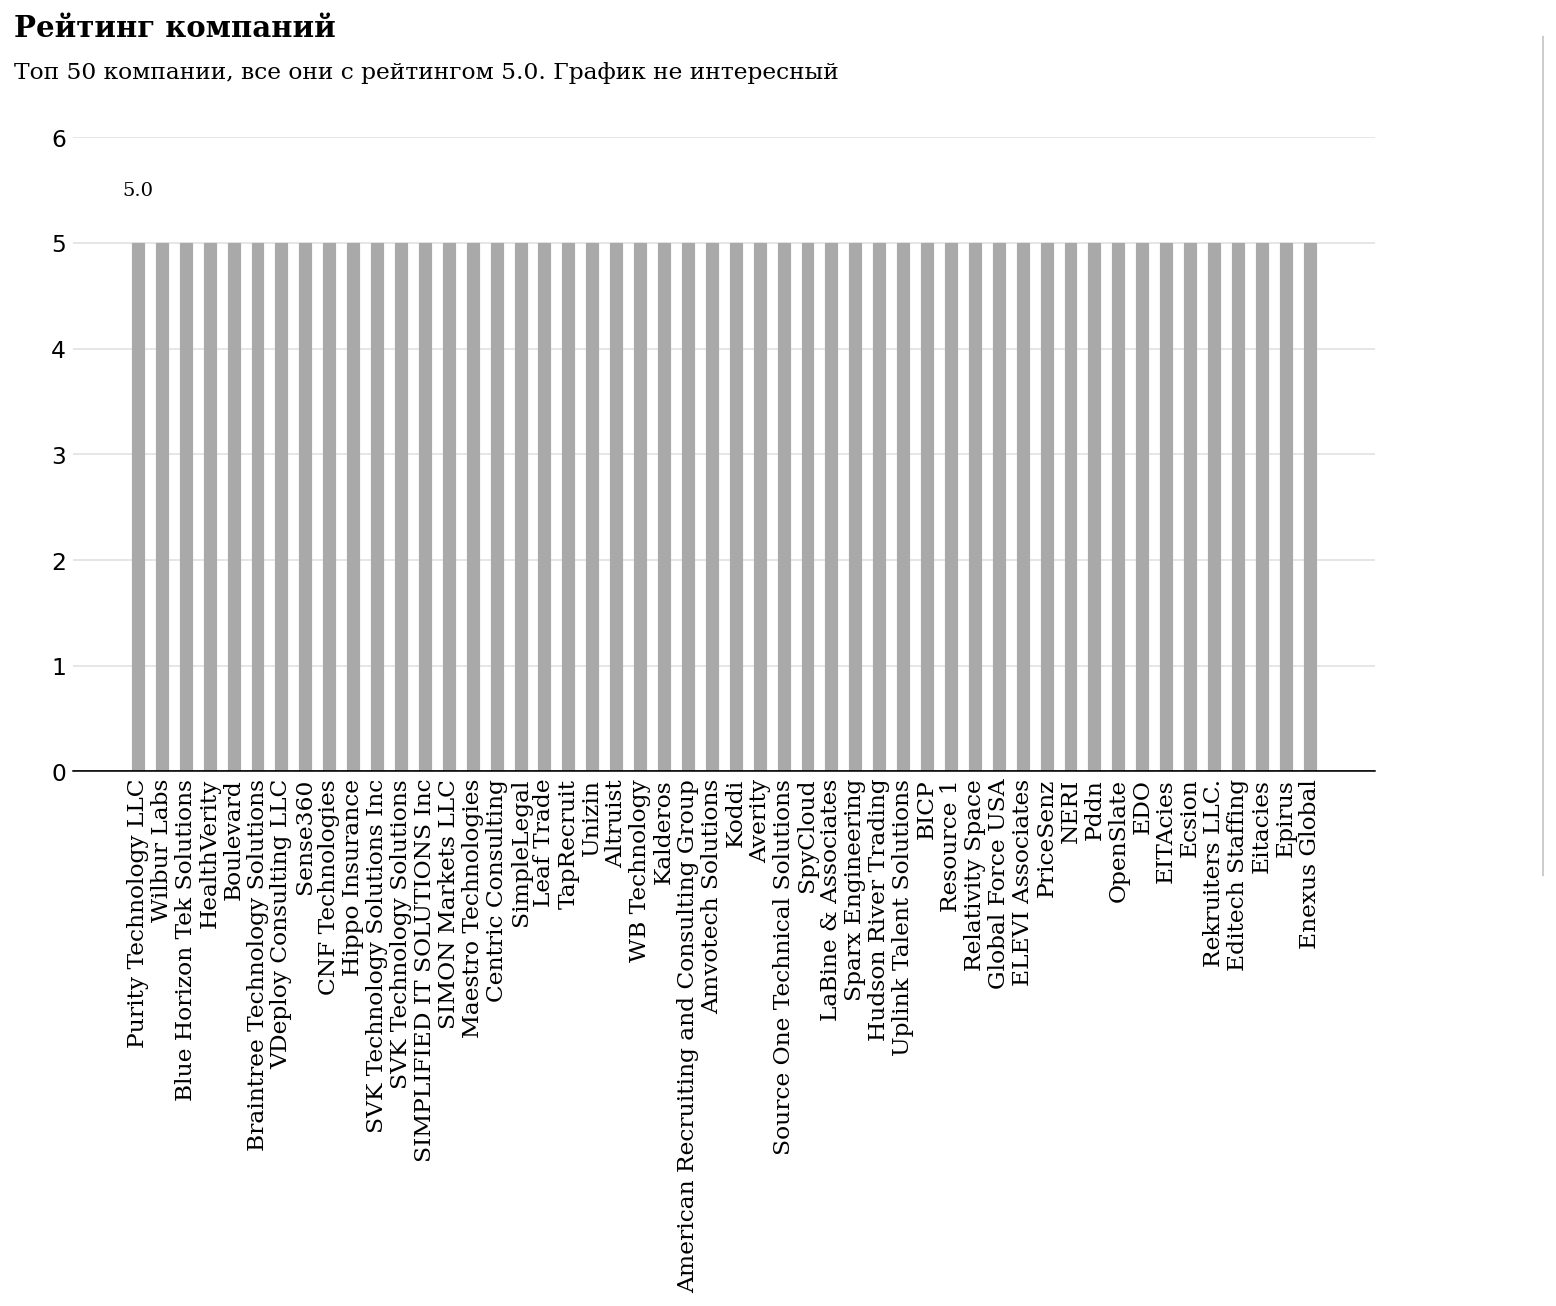

In [ ]:
data_rating = df.groupby('first_company')['Rating'].mean().sort_values(ascending=False)[:50]


# Plot

color_map = ['darkgray' for _ in range(3000)]
#for i in range(1432):
#  if data_rating[i]>=4.0:
#    color_map[i] =  '#0d0ea1' # color highlight
#  elif data_rating[i]<=0:
#    color_map[i] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_rating.index, data_rating, width=0.5, 
       edgecolor=color_map, #'#6a72c2'
       linewidth=0.6,color=color_map)

#annotations
annot_rate1=[]

for i in data_rating.index:
  if data_rating[i] % 1 ==0 and data_rating[i] not in annot_rate1:
    annot_rate1.append(data_rating[i])
    ax.annotate(f"{round(data_rating[i],1)}", 
                   xy=(i, data_rating[i] + 0.5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_rating.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Рейтинг компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Топ 50 компании, все они с рейтингом 5.0. График не интересный', fontsize=12, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#Больше всего вакансий размещает Amazon,
#дальше идут Apple и Lockheed Martin
#с одинаковым числом вакансий.
#Далее число вакансий постепенно 
#падает.

#Amazon и Apple — американские компании, 
#крупнейшие в мире на рынках платформ 
#электронной коммерции и по производству 
#персональных и планшетных компьютеров.
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 7, 1) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

#fig.text(0.11+0.45,0.9,"Топ рейтинг", fontweight="bold", fontfamily='serif', fontsize=15, color='#0d0ea1')
#fig.text(0.19+0.5,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
#fig.text(0.2+0.5,0.9,"Отрицательный рейтинг", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')

#ax._legend.remove()

plt.show()

In [ ]:
#df.groupby('first_company')['count'].sum().sort_values(ascending=False)

8. Построить график средних зарплат по популярным компаниям

In [ ]:
df_mean_sal=pd.DataFrame(df, columns = ["first_company","Salary Estimate", "Rating"])
df_mean_sal

,first_company,Salary Estimate,Rating
0,Sagence,$80K-$150K (Glassdoor est.),4.5
1,Enterprise Integration,$80K-$150K (Glassdoor est.),3.4
2,Maestro Technologies,$80K-$150K (Glassdoor est.),5.0
3,Jane Street,$80K-$150K (Glassdoor est.),4.8
4,GNY Insurance Companies,$80K-$150K (Glassdoor est.),3.7
...,...,...,...
2523,PMG Global,$76K-$128K (Glassdoor est.),4.5
2524,Albin Engineering Services,$76K-$128K (Glassdoor est.),2.9
2525,Cincinnati Bell Technology Solutions,$76K-$128K (Glassdoor est.),3.7
2526,Schwab,$76K-$128K (Glassdoor est.),3.5


In [ ]:
df_mean_sal["sal1"] = df_mean_sal["Salary Estimate"].apply(lambda x: x.replace('$', '').replace('K', '000').split("(")[0].split("-")[0])
df_mean_sal["sal2"] = df_mean_sal["Salary Estimate"].apply(lambda x: x.replace('$', '').replace('K', '000').split("(")[0].split("-")[1])
#df_mean_sal["sal2"] = int(df_mean_sal["sal1"]) + int(df_mean_sal["sal2"]) 
df_mean_sal["sal3"]= df_mean_sal["sal1"].apply(lambda x: int(x)/2)
df_mean_sal["sal4"]= df_mean_sal["sal2"].apply(lambda x: int(x)/2)
df_mean_sal["sal5"]= df_mean_sal["sal3"]+df_mean_sal["sal4"]
df_mean_sal

,first_company,Salary Estimate,Rating,sal1,sal2,sal3,sal4,sal5
0,Sagence,$80K-$150K (Glassdoor est.),4.5,80000,150000,40000.0,75000.0,115000.0
1,Enterprise Integration,$80K-$150K (Glassdoor est.),3.4,80000,150000,40000.0,75000.0,115000.0
2,Maestro Technologies,$80K-$150K (Glassdoor est.),5.0,80000,150000,40000.0,75000.0,115000.0
3,Jane Street,$80K-$150K (Glassdoor est.),4.8,80000,150000,40000.0,75000.0,115000.0
4,GNY Insurance Companies,$80K-$150K (Glassdoor est.),3.7,80000,150000,40000.0,75000.0,115000.0
...,...,...,...,...,...,...,...,...
2523,PMG Global,$76K-$128K (Glassdoor est.),4.5,76000,128000,38000.0,64000.0,102000.0
2524,Albin Engineering Services,$76K-$128K (Glassdoor est.),2.9,76000,128000,38000.0,64000.0,102000.0
2525,Cincinnati Bell Technology Solutions,$76K-$128K (Glassdoor est.),3.7,76000,128000,38000.0,64000.0,102000.0
2526,Schwab,$76K-$128K (Glassdoor est.),3.5,76000,128000,38000.0,64000.0,102000.0


In [ ]:
df_mean_sal.groupby('first_company')['sal5'].mean().sort_values(ascending=False)

In [ ]:
data_mean_sal = df_mean_sal.groupby('first_company')['sal5'].mean().sort_values(ascending=False)[:20]
data_mean_sal

first_company
EY                                                      217500.0
AmeriHealth Caritas                                     217500.0
Stellent IT LLC                                         217500.0
JLA                                                     217500.0
Sorrento Therapeutics                                   204000.0
Geocent                                                 204000.0
Venator Solutions                                       204000.0
Doctible                                                204000.0
Forward Slope Inc.                                      204000.0
University of California - San Diego Medical Centers    204000.0
Truvian Sciences                                        204000.0
Robin Healthcare                                        204000.0
SOLUTE                                                  204000.0
SVK Technology Solutions Inc                            204000.0
Whova                                                   204000.0
Sandbox Ban

In [ ]:
data_rating = df.groupby('first_company')['Rating'].mean().sort_values(ascending=False)#[:50]

In [ ]:
data_mean_sal.index[1]

'AmeriHealth Caritas'

In [ ]:
data_mean_sal[1]

217500.0

In [ ]:
data_rating.index[1]

'Wilbur Labs'

In [ ]:
data_mean_sal.count()

20

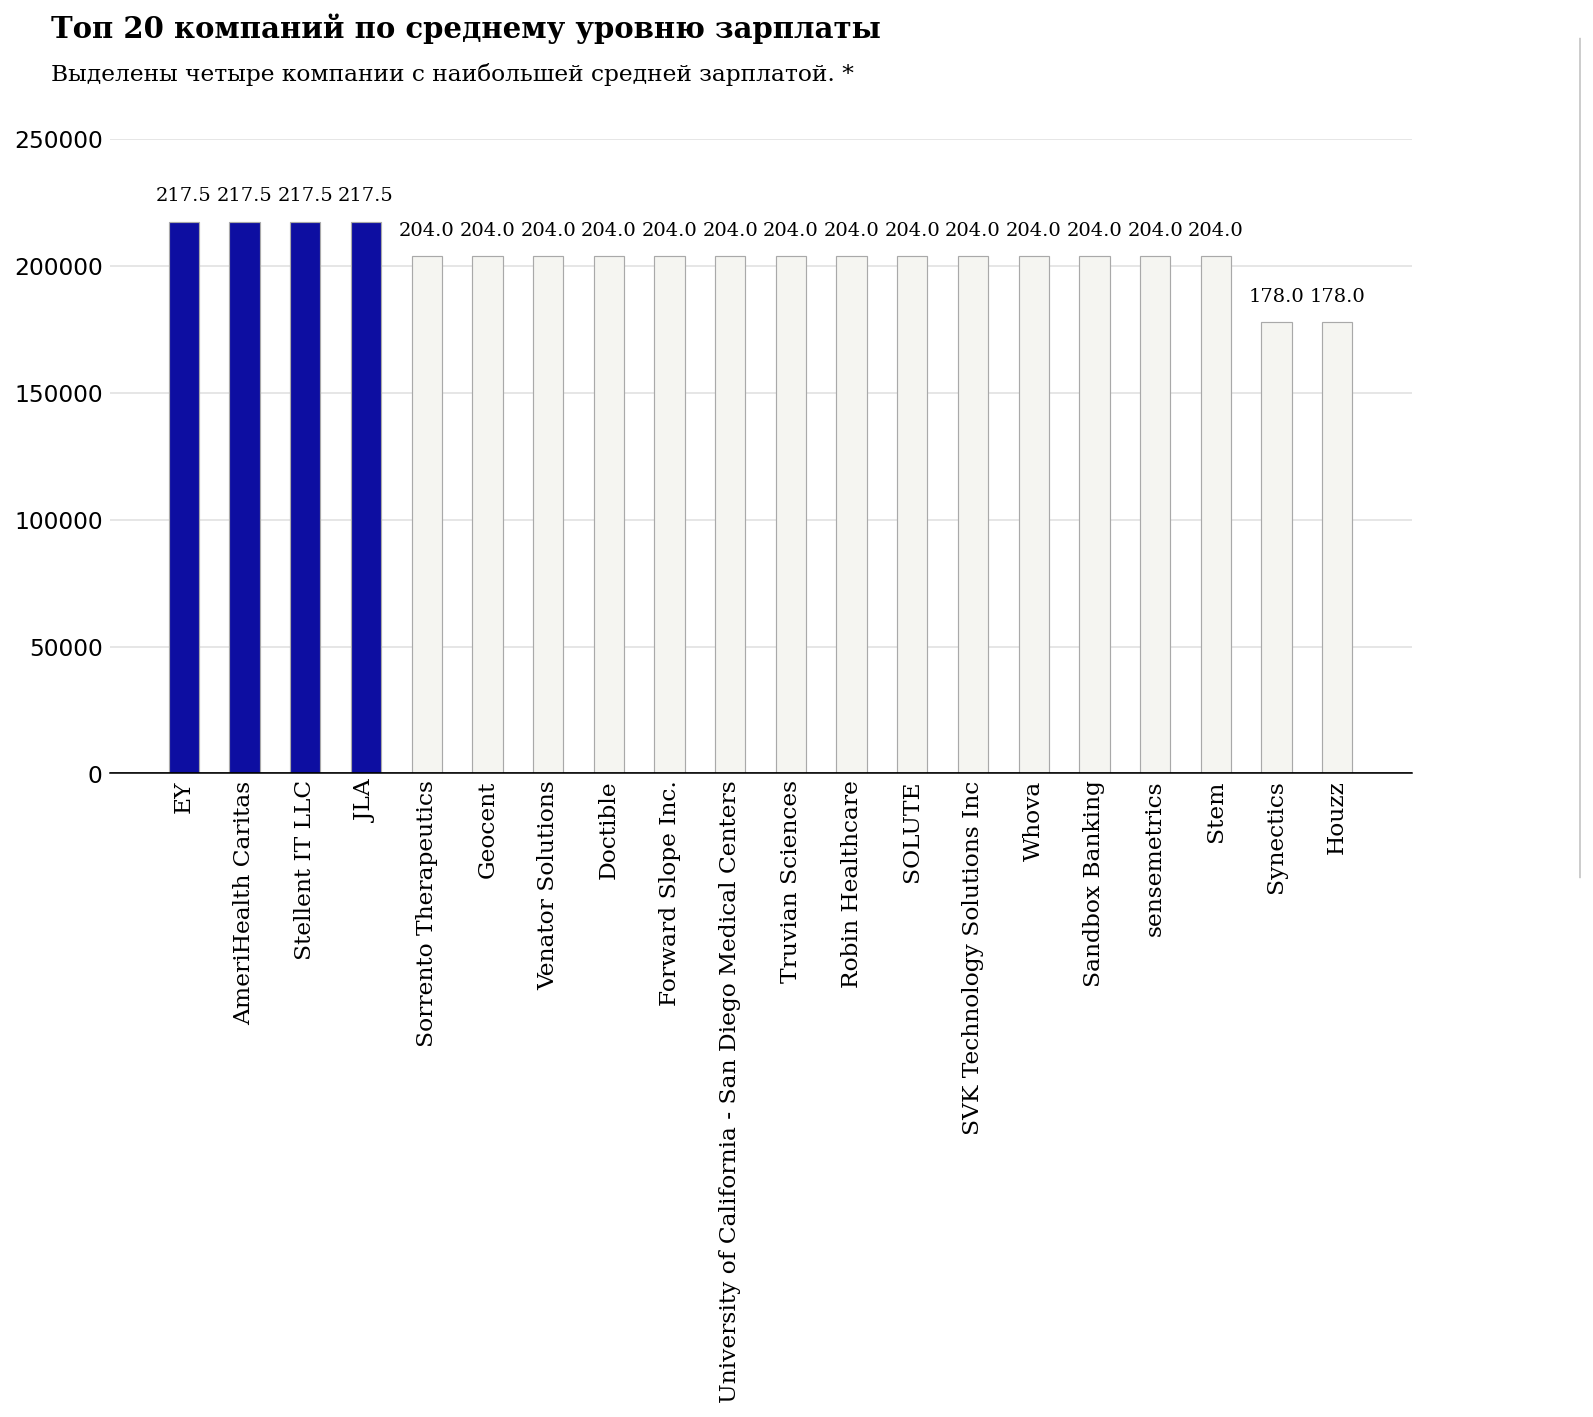

In [ ]:
# Plot

color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] = color_map[3]= '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_mean_sal.index, data_mean_sal, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data_mean_sal.index:
  #for j in data_rating.count():
    #if data_mean_sal.index[i]==data_rating.index[j]:
      #ax.annotate(f"{data_rating[i]}"+"", 
      ax.annotate(f"{data_mean_sal[i]/1000}"+"", 
                   xy=(i, data_mean_sal[i] + 10000), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_mean_sal.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 20 компаний по среднему уровню зарплаты ', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены четыре компании с наибольшей средней зарплатой. *', fontsize=12, fontweight='light', fontfamily='serif')
#fig.text(0.50, 0.9, '* Вакансии для разного опыта - Seniour и Junior объединены в одну общую вакансию. ', fontsize=8, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 300000, 50000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
#pd.DataFrame(df.groupby('first_company')['Salary Estimate'].sum().sort_values(ascending=False).reset_index())


9. Построить по описанию вакансий облако тегов, исследовать самые популярные слова


In [ ]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

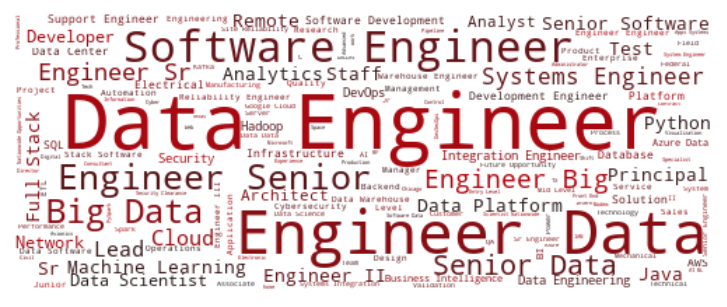

In [ ]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['Job Title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# если немного поправить текст
# и поменяем цвета на синий

text = str(list(df['Job Title'])).replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('(', '').replace(')', '').replace(' III', '').replace(' II', '').replace(' I ', ' ').replace('/', ' ').replace('-', '').replace('|', '').replace('&', ' ')
#text

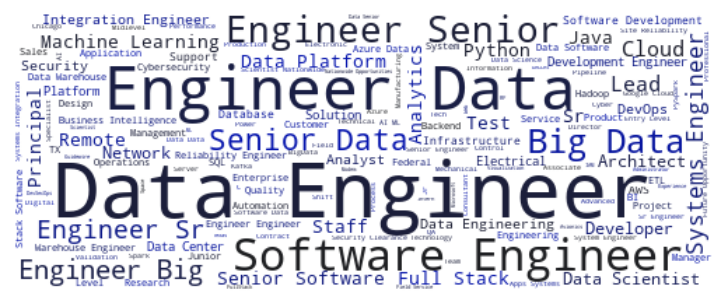

In [ ]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#1f2022', '#0717b2'])

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
"""

# Plot

color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] = color_map[3]= '#0d0ea1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_mean_sal.index, data_mean_sal, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations

#попытка совместить в графике подпись рейтинга компании с зарплатой в компании
for i in data_mean_sal.count():
  for j in data_rating.count():
    if data_mean_sal.index[i]==data_rating.index[j]:
      ax.annotate(f"{data_rating[i]}"+"", 
      #ax.annotate(f"{data_mean_sal[i]/1000}"+"", 
                   xy=(i, data_mean_sal[i] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_mean_sal.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 20 компаний по среднему уровню зарплаты ', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены четыре компании с наибольшей средней зарплатой. *', fontsize=12, fontweight='light', fontfamily='serif')
#fig.text(0.50, 0.9, '* Вакансии для разного опыта - Seniour и Junior объединены в одну общую вакансию. ', fontsize=8, fontweight='light', fontfamily='serif')

#fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

#fig.text(1.1, 0.67, '''
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 300000, 50000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()
"""

'\n\n# Plot\n\ncolor_map = [\'#f5f5f1\' for _ in range(20)]\ncolor_map[0] = color_map[1] = color_map[2] = color_map[3]= \'#0d0ea1\' # color highlight\n\nfig, ax = plt.subplots(1,1, figsize=(12, 6))\nax.bar(data_mean_sal.index, data_mean_sal, width=0.5, \n       edgecolor=\'darkgray\',\n       linewidth=0.6,color=color_map)\n\n#annotations\n\n#попытка совместить в графике подпись рейтинга компании с зарплатой в компании\nfor i in data_mean_sal.count():\n  for j in data_rating.count():\n    if data_mean_sal.index[i]==data_rating.index[j]:\n      ax.annotate(f"{data_rating[i]}"+"", \n      #ax.annotate(f"{data_mean_sal[i]/1000}"+"", \n                   xy=(i, data_mean_sal[i] + 10), #i like to change this to roughly 5% of the highest cat\n                   va = \'center\', ha=\'center\',fontweight=\'light\', fontfamily=\'serif\')\n\n\n\n# Remove border from plot\n\nfor s in [\'top\', \'left\', \'right\']:\n    ax.spines[s].set_visible(False)\n    \n# Tick labels\n\nax.set_xticklabels(da